In [33]:
import os
import sys
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Serif'
from scipy.stats import linregress

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.seasonal import seasonal_decompose


# point1n

In [34]:
git_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'HeroysundBridge-ML'))
asset_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'HeroysundBridge-ML-Assets'))

print("Path to git folder:", git_folder)
print("Path to asset folder:", asset_folder)

df = pd.read_parquet(os.path.join(asset_folder, 'silver','combined_data_v01.parquet'))
df.index = pd.to_datetime(df['Date'], format='%Y%m%d%H')
df = df[['Point_1_N_mean', 'PT100_Temperature_mean']]
df['Year'] = df.index.year
df['Month'] = df.index.month
display(df)


Path to git folder: c:\Users\erlih\repos\HeroysundBridge-ML
Path to asset folder: c:\Users\erlih\repos\HeroysundBridge-ML-Assets


,Point_1_N_mean,PT100_Temperature_mean,Year,Month
Date,,,,
2020-09-02 12:00:00,18.324186,16.261441,2020,9
2020-09-03 12:00:00,24.667922,16.858222,2020,9
2020-09-04 10:00:00,-15.535099,14.256647,2020,9
2020-09-04 14:00:00,-10.819921,14.687477,2020,9
2020-09-04 18:00:00,-15.399971,13.874647,2020,9
...,...,...,...,...
2023-12-31 18:00:00,-20.227229,-4.738139,2023,12
2023-12-31 19:00:00,-19.488729,-4.625233,2023,12
2023-12-31 20:00:00,-21.503484,-4.645648,2023,12


In [35]:
monthly_means = df.groupby(['Year', 'Month']).mean().reset_index()
display(monthly_means)

,Year,Month,Point_1_N_mean,PT100_Temperature_mean
0,2020,9,-74.782733,10.483486
1,2020,10,-86.400202,8.712354
2,2020,11,-90.903947,6.572270
3,2020,12,-87.241527,4.311835
4,2021,1,-46.773743,-0.464250
5,2021,2,-61.708098,0.419784
6,2021,3,-60.067525,3.082515
7,2021,4,-57.087728,4.142249
8,2021,5,-47.008419,8.645810
9,2021,6,28.959768,16.870101


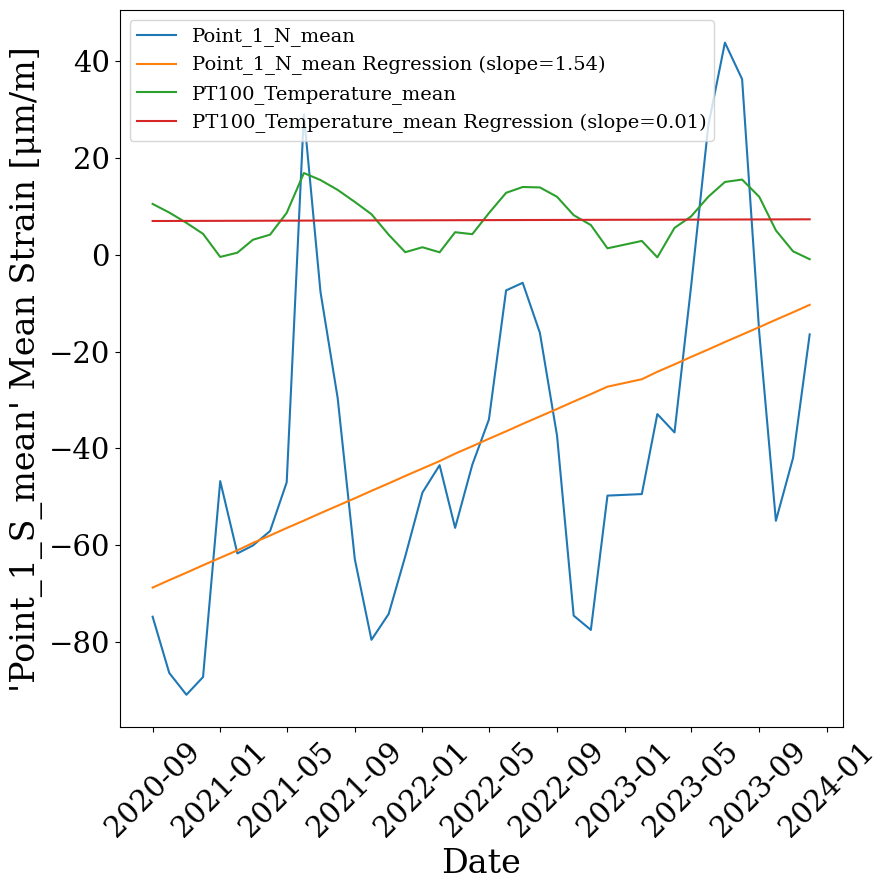

In [36]:
df = pd.DataFrame(monthly_means)

# Convert Year-Month to datetime format for plotting
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')

# Sort the DataFrame by date for plotting
df.sort_values('Date', inplace=True)

# Perform linear regression on Point_1_N_mean
slope_p1, intercept_p1, _, _, _ = linregress(df.index, df['Point_1_N_mean'])
regression_line_p1 = slope_p1 * df.index + intercept_p1

# Perform linear regression on PT100_Temperature_mean
slope_temp, intercept_temp, _, _, _ = linregress(df.index, df['PT100_Temperature_mean'])
regression_line_temp = slope_temp * df.index + intercept_temp

# Plotting trends for Point_1_N_mean and PT100_Temperature_mean with regression lines
plt.figure(figsize=(9,9))
plt.plot(df['Date'], df['Point_1_N_mean'], label='Point_1_N_mean')
plt.plot(df['Date'], regression_line_p1, label=f'Point_1_N_mean Regression (slope={slope_p1:.2f})')
plt.plot(df['Date'], df['PT100_Temperature_mean'], label='PT100_Temperature_mean')
plt.plot(df['Date'], regression_line_temp, label=f'PT100_Temperature_mean Regression (slope={slope_temp:.2f})')
plt.xlabel('Date', fontsize=16*1.5)
plt.ylabel("'Point_1_S_mean' Mean Strain [μm/m]", fontsize=16*1.5)
#plt.title('Trend Over Time with Linear Regression', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=14*1.5)
plt.xticks(fontsize=14*1.5)
plt.tight_layout()
plt.show()

# point6s

In [37]:
git_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'HeroysundBridge-ML'))
asset_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'HeroysundBridge-ML-Assets'))

print("Path to git folder:", git_folder)
print("Path to asset folder:", asset_folder)

df = pd.read_parquet(os.path.join(asset_folder, 'silver','combined_data_v01.parquet'))
df.index = pd.to_datetime(df['Date'], format='%Y%m%d%H')
df = df[['Point_6_S_mean', 'PT100_Temperature_mean']]
df['Year'] = df.index.year
df['Month'] = df.index.month
display(df)

Path to git folder: c:\Users\erlih\repos\HeroysundBridge-ML
Path to asset folder: c:\Users\erlih\repos\HeroysundBridge-ML-Assets


,Point_6_S_mean,PT100_Temperature_mean,Year,Month
Date,,,,
2020-09-02 12:00:00,32.350760,16.261441,2020,9
2020-09-03 12:00:00,46.496854,16.858222,2020,9
2020-09-04 10:00:00,29.849380,14.256647,2020,9
2020-09-04 14:00:00,37.997157,14.687477,2020,9
2020-09-04 18:00:00,36.255848,13.874647,2020,9
...,...,...,...,...
2023-12-31 18:00:00,-257.119294,-4.738139,2023,12
2023-12-31 19:00:00,-256.383557,-4.625233,2023,12
2023-12-31 20:00:00,-258.295017,-4.645648,2023,12


In [38]:
monthly_means = df.groupby(['Year', 'Month']).mean().reset_index()
display(monthly_means)

,Year,Month,Point_6_S_mean,PT100_Temperature_mean
0,2020,9,-40.017596,10.483486
1,2020,10,-78.278240,8.712354
2,2020,11,-84.001045,6.572270
3,2020,12,-105.557906,4.311835
4,2021,1,-157.812744,-0.464250
5,2021,2,-151.568597,0.419784
6,2021,3,-105.284646,3.082515
7,2021,4,-85.133579,4.142249
8,2021,5,-16.492581,8.645810
9,2021,6,94.820266,16.870101


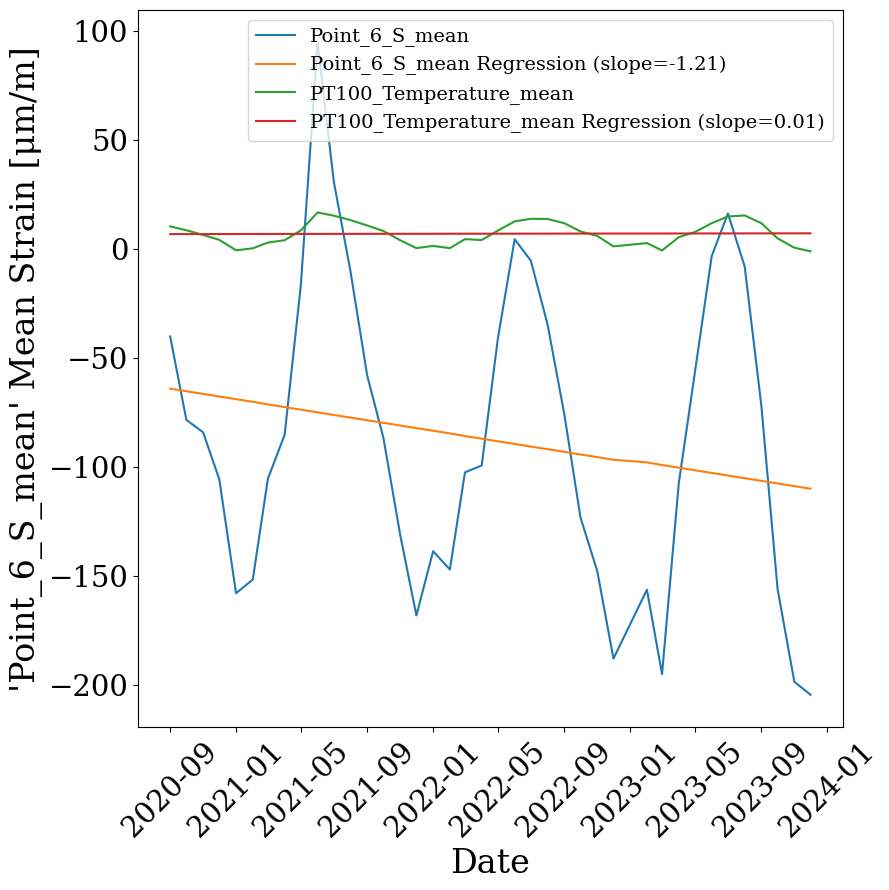

In [39]:
df = pd.DataFrame(monthly_means)

# Convert Year-Month to datetime format for plotting
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')

# Sort the DataFrame by date for plotting
df.sort_values('Date', inplace=True)

# Perform linear regression on Point_1_N_mean
slope_p1, intercept_p1, _, _, _ = linregress(df.index, df['Point_6_S_mean'])
regression_line_p1 = slope_p1 * df.index + intercept_p1

# Perform linear regression on PT100_Temperature_mean
slope_temp, intercept_temp, _, _, _ = linregress(df.index, df['PT100_Temperature_mean'])
regression_line_temp = slope_temp * df.index + intercept_temp

# Plotting trends for Point_1_N_mean and PT100_Temperature_mean with regression lines
plt.figure(figsize=(9,9))
plt.plot(df['Date'], df['Point_6_S_mean'], label='Point_6_S_mean')
plt.plot(df['Date'], regression_line_p1, label=f'Point_6_S_mean Regression (slope={slope_p1:.2f})')
plt.plot(df['Date'], df['PT100_Temperature_mean'], label='PT100_Temperature_mean')
plt.plot(df['Date'], regression_line_temp, label=f'PT100_Temperature_mean Regression (slope={slope_temp:.2f})')
plt.xlabel('Date', fontsize=16*1.5)
plt.ylabel("'Point_6_S_mean' Mean Strain [μm/m]", fontsize=16*1.5)
#plt.title('Trend Over Time with Linear Regression', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=14*1.5)
plt.xticks(fontsize=14*1.5)
plt.tight_layout()
plt.show()

# inspection of gaps

In [40]:
import pandas as pd
# Calculate time intervals between consecutive indices
time_diff = df.index.to_series().diff()

# Check for gaps in the index
gaps = time_diff[time_diff != pd.Timedelta(seconds=1)]

# Print information about the gaps
if not gaps.empty:
    print("Gaps in index:")
    print(gaps)
else:
    print("No gaps found in the index.")

Gaps in index:
0     NaN
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
dtype: float64


In [41]:
import pandas as pd
time_diff = df.index.to_series().diff()

# Define the threshold for gap detection (1 hour in this case)
threshold = pd.Timedelta(hours=1)

# Check for gaps in the index greater than the threshold
gaps = time_diff[time_diff > threshold]

# Count the number of gaps greater than 1 hour
num_gaps_greater_than_1_hour = len(gaps[gaps > threshold])

print(f"Number of gaps greater than 1 hour: {num_gaps_greater_than_1_hour}")

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'Timedelta'

In [ ]:
import pandas as pd

# Calculate time intervals between consecutive indices
time_diff = df.index.to_series().diff()

# Define the threshold for gap detection (1 hour in this case)
threshold = pd.Timedelta(hours=1)

# Check for gaps in the index greater than the threshold
gaps = time_diff[time_diff > threshold]

# Initialize a list to store gap information
gap_info = []

# Loop through gaps greater than the threshold
for idx in gaps.index:
    diff = gaps[idx]
    if diff > threshold:
        start_gap = idx - diff  # Start of the gap
        gap_info.append((start_gap, idx, diff))

# Print information about the gaps
if gap_info:
    print("Information about the gaps greater than 1 hour:")
    for start, end, length in gap_info:
        print(f"Gap from {start} to {end}, length: {length} hours")
else:
    print("No gaps found in the index greater than 1 hour.")


Information about the gaps greater than 1 hour:
Gap from 2020-09-02 12:00:00 to 2020-09-03 12:00:00, length: 1 days 00:00:00 hours
Gap from 2020-09-03 12:00:00 to 2020-09-04 10:00:00, length: 0 days 22:00:00 hours
Gap from 2020-09-04 10:00:00 to 2020-09-04 14:00:00, length: 0 days 04:00:00 hours
Gap from 2020-09-04 14:00:00 to 2020-09-04 18:00:00, length: 0 days 04:00:00 hours
Gap from 2020-09-04 18:00:00 to 2020-09-04 22:00:00, length: 0 days 04:00:00 hours
Gap from 2020-09-04 22:00:00 to 2020-09-05 02:00:00, length: 0 days 04:00:00 hours
Gap from 2020-09-05 02:00:00 to 2020-09-05 06:00:00, length: 0 days 04:00:00 hours
Gap from 2020-09-05 06:00:00 to 2020-09-05 10:00:00, length: 0 days 04:00:00 hours
Gap from 2020-09-05 10:00:00 to 2020-09-05 14:00:00, length: 0 days 04:00:00 hours
Gap from 2020-09-05 14:00:00 to 2020-09-05 18:00:00, length: 0 days 04:00:00 hours
Gap from 2020-09-05 18:00:00 to 2020-09-05 22:00:00, length: 0 days 04:00:00 hours
Gap from 2020-09-05 22:00:00 to 2020-09

# slutningstatisikk

In [42]:
import os
import sys
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Serif'

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import mean_squared_error, mean_absolute_error
from tensorflow.keras.optimizers import Adam

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
from tensorflow.keras.losses import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score as score

def df_to_X_y(dataset, window_size = 6):
    X = []
    y = []
    for i in range(window_size, len(dataset)):
        X.append(dataset.iloc[i-window_size:i, 1:].values)  # Use all columns except 'Point_1_N_mean' as input
        y.append(dataset.iloc[i, 0])  # Use 'Point_1_N_mean' as output
    a = np.array(X)
    b= np.array(y)
    return a, b

# Plot the predictions of the model
def plot_predictions(dataset, split, model, X, y, start=0, end=100, scaler=None):
    predictions = model.predict(X).flatten()
    predictions = predictions.reshape(-1, 1) 
    if scaler is not None:
        predictions = scaler.inverse_transform(predictions)
    df = pd.DataFrame(data={'Predictions': predictions.flatten(),'Actuals': y})
    plt.figure(figsize=(12, 5))
    plt.plot(dataset[-split:].index,df['Actuals'][start:end], label='Test Dataset')
    plt.plot(dataset[-split:].index,df['Predictions'][start:end], label='ML Predictions')
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel('Date',fontsize=16)
    plt.ylabel("'Point_1_N_mean' Strain [μm/m]",fontsize=16)
    plt.legend(fontsize=14)
    plt.show()
    print(f"MSE: {mean_squared_error(df['Actuals'][start:end], df['Predictions'][start:end])}")
    print(f"MAE: {mean_absolute_error(df['Actuals'][start:end], df['Predictions'][start:end])}")
    print(f"R^2 Score: {score(df['Actuals'][start:end], df['Predictions'][start:end])}")
    display(df)


# Plot on validation set
def plot_predictions_1(dataset, split, model, X, y, start=0, end=100, scaler=None):
    predictions = model.predict(X).flatten()
    predictions = predictions.reshape(-1, 1) 
    if scaler is not None:
        predictions = scaler.inverse_transform(predictions)
    df = pd.DataFrame(data={'Predictions': predictions.flatten(),'Actuals': y})
    plt.figure(figsize=(10, 5))
    plt.plot(dataset[split[0]:-split[2]].index,df['Actuals'][start:end])
    plt.plot(dataset[split[0]:-split[2]].index,df['Predictions'][start:end])
    plt.show()
    print(f"MSE: {mean_squared_error(df['Actuals'][start:end], df['Predictions'][start:end])}")
    print(f"MAE: {mean_absolute_error(df['Actuals'][start:end], df['Predictions'][start:end])}")
    print(f"R^2 Score: {score(df['Actuals'][start:end], df['Predictions'][start:end])}")
    display(df)

Path to git folder: c:\Users\erlih\repos\HeroysundBridge-ML
Path to asset folder: c:\Users\erlih\repos\HeroysundBridge-ML-Assets


,Point_1_N_mean,PT100_Temperature_mean,Average_Global_Radiation_(1h),Relative_Humidity(1h),Precipitation_(1h),Average_of_Mean_Wind_(1h),Day sin,Day cos,Year sin,Year cos,days_since_start
Date,,,,,,,,,,,
2020-10-01 00:00:00,-72.143402,12.476844,0.0,71.0,0.0,1.1,-8.575893e-12,1.000000e+00,-0.977848,0.209315,0
2020-10-01 01:00:00,-74.569743,12.202079,0.0,75.0,0.0,1.5,2.588190e-01,9.659258e-01,-0.977698,0.210016,0
2020-10-01 02:00:00,-76.690182,11.993529,0.0,72.0,0.0,1.8,5.000000e-01,8.660254e-01,-0.977547,0.210717,0
2020-10-01 03:00:00,-78.859715,11.865803,0.0,77.0,0.0,1.8,7.071068e-01,7.071068e-01,-0.977396,0.211418,0
2020-10-01 04:00:00,-80.511559,11.889412,0.0,76.0,0.0,1.8,8.660254e-01,5.000000e-01,-0.977244,0.212119,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 18:00:00,-20.227229,-4.738139,-3.0,60.0,0.0,1.1,-1.000000e+00,-1.136945e-11,0.217723,0.976011,1186
2023-12-31 19:00:00,-19.488729,-4.625233,-3.0,59.0,0.0,1.3,-9.659258e-01,2.588190e-01,0.218423,0.975854,1186
2023-12-31 20:00:00,-21.503484,-4.645648,-2.9,57.0,0.0,1.3,-8.660254e-01,5.000000e-01,0.219123,0.975697,1186


Training split: 19000, Validation split: 4750, Test split: 2640
(25670, 720, 10) (25670,)
(19000, 720, 10) (19000,) (4750, 720, 10) (4750,) (2640, 720, 10) (2640,)


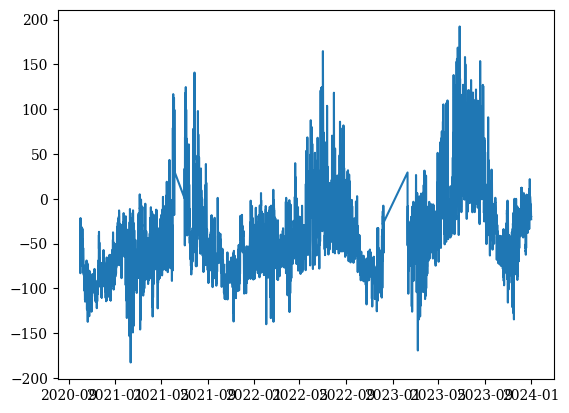

In [44]:
git_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'HeroysundBridge-ML'))
asset_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'HeroysundBridge-ML-Assets'))

print("Path to git folder:", git_folder)
print("Path to asset folder:", asset_folder)

df = pd.read_parquet(os.path.join(asset_folder, 'silver','combined_data_v01.parquet'))
df.index = pd.to_datetime(df['Date'], format='%Y%m%d%H')
df.to_csv(os.path.join(asset_folder, 'silver','inspection.csv'))

model_dataset = df[['Point_1_N_mean', 'PT100_Temperature_mean', 'Average_Global_Radiation_(1h)', 'Relative_Humidity(1h)', 'Precipitation_(1h)', 'Average_of_Mean_Wind_(1h)']]['2020-10-01 00:00:00':]#
model_dataset['seconds'] = model_dataset.index.map(pd.Timestamp.timestamp)
model_dataset['Day sin'] = np.sin(model_dataset['seconds'] * (2 * np.pi / 86400))
model_dataset['Day cos'] = np.cos(model_dataset['seconds'] * (2 * np.pi / 86400))
model_dataset['Year sin'] = np.sin(model_dataset['seconds'] * (2 * np.pi / 31536000))
model_dataset['Year cos'] = np.cos(model_dataset['seconds'] * (2 * np.pi / 31536000))
model_dataset['days_since_start'] = (model_dataset.index - model_dataset.index[0]).days
model_dataset.drop(columns=['seconds'], inplace=True)
display(model_dataset)
plt.plot(model_dataset.index, model_dataset['Point_1_N_mean'])

dataset_size = len(model_dataset)
training_split = int(0.72 * dataset_size)
validation_split = int(0.18 * dataset_size)
test_split = dataset_size - training_split - validation_split
print(f"Training split: {training_split}, Validation split: {validation_split}, Test split: {test_split}")
assert training_split + validation_split + test_split == dataset_size, "Invalid split sizes"

window_size = 24*30

X, y = df_to_X_y(model_dataset, window_size)
print(X.shape, y.shape)

# Splitting the data into training, validation and test sets
X_train, y_train = X[:training_split], y[:training_split]
X_valid, y_valid = X[training_split:(training_split + validation_split)], y[training_split:(training_split + validation_split)]
X_test, y_test = X[-test_split:], y[-test_split:]
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

# Reshape to 2D (Normalisation requires 2D input)
X_train_2D = np.reshape(X_train, (X_train.shape[0] * X_train.shape[1], X_train.shape[2]))
X_valid_2D = np.reshape(X_valid, (X_valid.shape[0] * X_valid.shape[1], X_valid.shape[2]))
X_test_2D = np.reshape(X_test, (X_test.shape[0] * X_test.shape[1], X_test.shape[2]))

# Apply scaling
scaler_x = StandardScaler()
X_train_scaled_2D = scaler_x.fit_transform(X_train_2D)
X_valid_scaled_2D = scaler_x.transform(X_valid_2D)
X_test_scaled_2D = scaler_x.transform(X_test_2D)

# Reshape back to 3D
X_train_scaled = np.reshape(X_train_scaled_2D, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_valid_scaled = np.reshape(X_valid_scaled_2D, (X_valid.shape[0], X_valid.shape[1], X_valid.shape[2]))
X_test_scaled = np.reshape(X_test_scaled_2D, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_valid_scaled = scaler_y.transform(y_valid.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

#######################################

In [45]:
model_name = 'lstm_model_point_1_N_001'
model_file_path = os.path.join(asset_folder, 'gold', model_name)
model = load_model(model_file_path)

predictions = model.predict(X_test_scaled).flatten()
predictions = predictions.reshape(-1, 1)
predictions = scaler_y.inverse_transform(predictions) 

pred_df = predictions

83/83 [==============================] - 23s 278ms/step


In [46]:

mesu = model_dataset[-test_split:]['Point_1_N_mean'].values
predic = pred_df.flatten()
print(mesu, "################################", predic)
df_1=pd.DataFrame(mesu)
df_2=pd.DataFrame(predic)
df_1.to_parquet('C:\\Users\\erlih\\repos\\HeroysundBridge-ML-Assets\\mesu.parquet')
df_2.to_parquet('C:\\Users\\erlih\\repos\\HeroysundBridge-ML-Assets\\predic.parquet')

[-23.29060247 -27.65744536 -31.50555962 ... -21.5034845  -22.66701496
 -22.80013823] ################################ [-38.182007 -40.713833 -42.990295 ... -24.387249 -22.53747  -20.561722]


In [47]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = mesu
data2 = predic

print('Pearsons correlation test')
stat, p = pearsonr(data1, data2)
print('Pearson correlation coefficient=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

Pearsons correlation test
Pearson correlation coefficient=0.788, p=0.000
Probably dependent


In [ ]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = mesu
data2 = predic

print('Paired Student t-test')
stat, p = ttest_rel(data1, data2)
print( 'p=%.3f' % (p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

Paired Student t-test
p=0.000
Probably different distributions


Mean Squared Error: 435.2149824560463
39.33492966617128
49.745966161799515
95% Confidence Interval for 'predic': 0.00 to 39.33
99% Confidence Interval for 'predic': 0.00 to 49.75


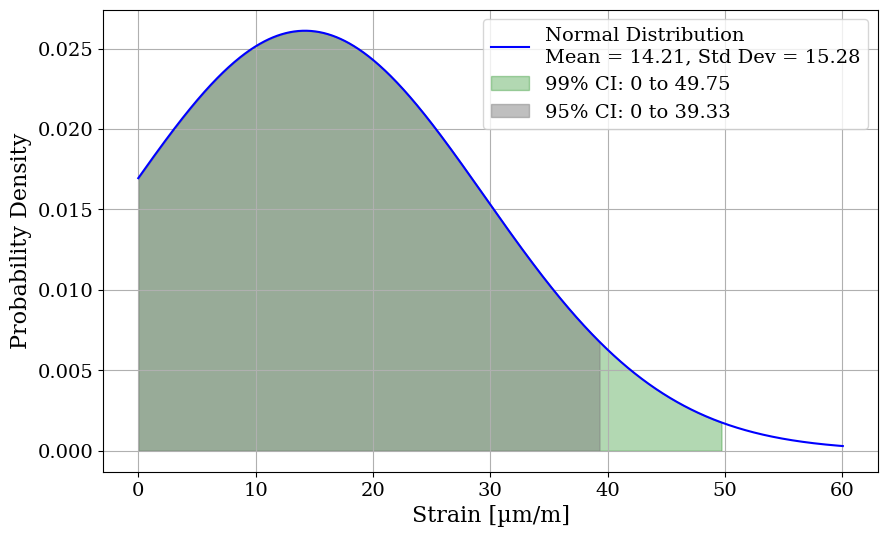

In [48]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Calculate Mean Squared Error
mse = np.mean((mesu - predic) ** 2)
print("Mean Squared Error:", mse)

# Calculate the mean and standard deviation for predic
diff = mesu - predic

mean_predic = np.mean(diff)
std_predic = np.std(diff)

# Parameter for z-scores for one-tailed confidence intervals
z_95 = norm.ppf(0.95)  # 95% CI, one-tailed
z_99 = norm.ppf(0.99)  # 99% CI, one-tailed

# Confidence interval bounds
upper_95_predic = mean_predic + z_95 * std_predic
upper_99_predic = mean_predic + z_99 * std_predic
print(upper_95_predic)
print(upper_99_predic)
# Generate x values for plotting
x = np.linspace(0, mean_predic + 3*std_predic, 1000)
pdf = norm.pdf(x, mean_predic, std_predic)

print(f"95% Confidence Interval for 'predic': {0:.2f} to {upper_95_predic:.2f}")
print(f"99% Confidence Interval for 'predic': {0:.2f} to {upper_99_predic:.2f}")

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'b-', label=f'Normal Distribution\nMean = {mean_predic:.2f}, Std Dev = {std_predic:.2f}' )

# Highlight the 99.5% Confidence Interval
plt.fill_between(x, 0, norm.pdf(x, mean_predic, std_predic), where=(x <= upper_99_predic),
                 color='green', alpha=0.3,
                 label=f'99% CI: {0} to {upper_99_predic:.2f}')

# Highlight the 95% Confidence Interval
plt.fill_between(x, 0, norm.pdf(x, mean_predic, std_predic), where=(x <= upper_95_predic),
                 color='gray', alpha=0.5,
                 label=f'95% CI: {0} to {upper_95_predic:.2f}')

plt.xlabel('Strain [µm/m]', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.show()

39.33492966617128
49.745966161799515
35.53910061839494
2.3263478740408408
15.27677825615303


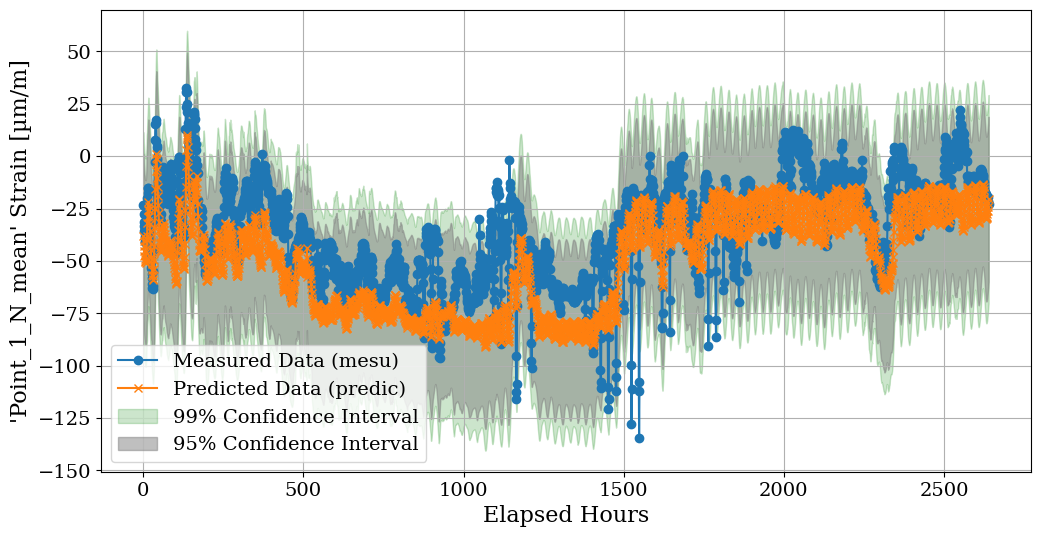

In [49]:
# Calculate mean and standard deviation of predic
mean_predic = np.mean(predic)
std_predic = np.std(predic)
mean_predic = np.mean(diff)
std_predic = np.std(diff)
upper_95_predic = mean_predic + z_95 * std_predic
upper_99_predic = mean_predic + z_99 * std_predic
print(upper_95_predic)
print(upper_99_predic)

ci_lower_95 = predic - (upper_95_predic)
ci_upper_95 = predic + (upper_95_predic)
ci_lower_99 = predic - (upper_99_predic)
ci_upper_99 = predic + (upper_99_predic)
print(z_99 * std_predic)
print(z_99)
print(std_predic)
# X values for plotting
x_values = np.arange(len(predic))  # Assuming predic has a length

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x_values, mesu, label='Measured Data (mesu)', marker='o', linestyle='-')
plt.plot(x_values, predic, label='Predicted Data (predic)', marker='x', linestyle='-')

# Plot 99% CI first with green
plt.fill_between(x_values, ci_lower_99, ci_upper_99, color='green', alpha=0.2, label='99% Confidence Interval')

# Plot 95% CI on top with yellow
plt.fill_between(x_values, ci_lower_95, ci_upper_95, color='gray', alpha=0.5, label='95% Confidence Interval')

plt.xlabel('Elapsed Hours', fontsize=16)
plt.ylabel("'Point_1_N_mean' Strain [µm/m]", fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
model_name = 'lstm_model_point_6_S_002'
model_file_path = os.path.join(asset_folder, 'gold', model_name)
model = load_model(model_file_path)


predictions = model.predict(X_test_scaled).flatten()
predictions = predictions.reshape(-1, 1)
predictions = scaler_y.inverse_transform(predictions) 

pred_df = predictions

83/83 [==============================] - 21s 250ms/step


# Fake damaset DAMAGE

In [ ]:
git_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'HeroysundBridge-ML'))
asset_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'HeroysundBridge-ML-Assets'))

df = pd.read_parquet(os.path.join(asset_folder, 'silver','combined_data_v01.parquet'))
df.index = pd.to_datetime(df['Date'], format='%Y%m%d%H')
df.to_csv(os.path.join(asset_folder, 'silver','inspection.csv'))

model_dataset_damaged_fake = df[['Point_1_N_mean', 'PT100_Temperature_mean', 'Average_Global_Radiation_(1h)', 'Relative_Humidity(1h)', 'Precipitation_(1h)', 'Average_of_Mean_Wind_(1h)']]['2020-10-01 00:00:00':]#
model_dataset_damaged_fake['seconds'] = model_dataset_damaged_fake.index.map(pd.Timestamp.timestamp)
model_dataset_damaged_fake['Day sin'] = np.sin(model_dataset_damaged_fake['seconds'] * (2 * np.pi / 86400))
model_dataset_damaged_fake['Day cos'] = np.cos(model_dataset_damaged_fake['seconds'] * (2 * np.pi / 86400))
model_dataset_damaged_fake['Year sin'] = np.sin(model_dataset_damaged_fake['seconds'] * (2 * np.pi / 31536000))
model_dataset_damaged_fake['Year cos'] = np.cos(model_dataset_damaged_fake['seconds'] * (2 * np.pi / 31536000))
model_dataset_damaged_fake['days_since_start'] = (model_dataset_damaged_fake.index - model_dataset_damaged_fake.index[0]).days
model_dataset_damaged_fake.drop(columns=['seconds'], inplace=True)



dataset_size = len(model_dataset_damaged_fake)
training_split = int(0.72 * dataset_size)
validation_split = int(0.18 * dataset_size)
test_split = dataset_size - training_split - validation_split
print(f"Training split: {training_split}, Validation split: {validation_split}, Test split: {test_split}")
assert training_split + validation_split + test_split == dataset_size, "Invalid split sizes"

midpoint_index = (test_split//2) #len(model_dataset_damaged_fake) // 2
gap = 132.5  # Adjust this value as needed
model_dataset_damaged_fake.loc[model_dataset_damaged_fake.index[training_split + validation_split +midpoint_index:], 'Point_1_N_mean'] += gap

window_size = 24*30

X, y = df_to_X_y(model_dataset_damaged_fake, window_size)
print(X.shape, y.shape)

# Splitting the data into training, validation and test sets
X_train, y_train = X[:training_split], y[:training_split]
X_valid, y_valid = X[training_split:(training_split + validation_split)], y[training_split:(training_split + validation_split)]
X_test, y_test = X[-test_split:], y[-test_split:]
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

# Reshape to 2D (Normalisation requires 2D input)
X_train_2D = np.reshape(X_train, (X_train.shape[0] * X_train.shape[1], X_train.shape[2]))
X_valid_2D = np.reshape(X_valid, (X_valid.shape[0] * X_valid.shape[1], X_valid.shape[2]))
X_test_2D = np.reshape(X_test, (X_test.shape[0] * X_test.shape[1], X_test.shape[2]))

# Apply scaling
scaler_x_error = StandardScaler()
X_train_scaled_2D = scaler_x.fit_transform(X_train_2D)
X_valid_scaled_2D = scaler_x.transform(X_valid_2D)
X_test_scaled_2D = scaler_x.transform(X_test_2D)

# Reshape back to 3D
X_train_scaled = np.reshape(X_train_scaled_2D, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_valid_scaled = np.reshape(X_valid_scaled_2D, (X_valid.shape[0], X_valid.shape[1], X_valid.shape[2]))
X_test_scaled = np.reshape(X_test_scaled_2D, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_valid_scaled = scaler_y.transform(y_valid.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

Training split: 19000, Validation split: 4750, Test split: 2640
(25670, 720, 10) (25670,)
(19000, 720, 10) (19000,) (4750, 720, 10) (4750,) (2640, 720, 10) (2640,)


In [ ]:
model_name = 'lstm_model_point_1_N_001'
model_file_path = os.path.join(asset_folder, 'gold', model_name)
model = load_model(model_file_path)


predictions = model.predict(X_test_scaled).flatten()
predictions = predictions.reshape(-1, 1)
predictions = scaler_y.inverse_transform(predictions) 

pred_df = predictions

83/83 [==============================] - 27s 328ms/step


In [ ]:
import pandas as pd

mesu = model_dataset_damaged_fake[-test_split:]['Point_1_N_mean'].values
predic = pred_df.flatten()
print(mesu, "################################", predic)

[-23.29060247 -27.65744536 -31.50555962 ... 110.9965155  109.83298504
 109.69986177] ################################ [-38.182007 -40.713833 -42.990295 ... -24.387249 -22.53747  -20.561722]


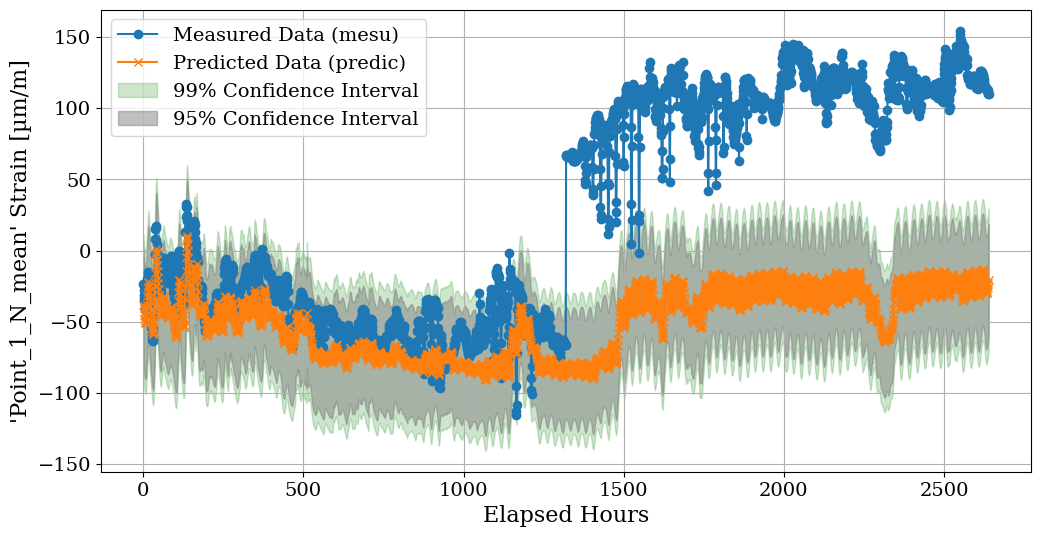

In [ ]:
x_values = np.arange(len(predic))  # Assuming predic has a length

# Plotting
plt.figure(figsize=(12, 6))

# # Plot measured data with a drop of 100 at the halfway point
# mesu_modified = np.array(mesu)
# mesu_modified[(2640//2):] += 132.5
plt.plot(x_values, mesu, label='Measured Data (mesu)', marker='o', linestyle='-')

# Plot predicted data
plt.plot(x_values, predic, label='Predicted Data (predic)', marker='x', linestyle='-')

plt.fill_between(x_values, ci_lower_99, ci_upper_99, color='green', alpha=0.2, label='99% Confidence Interval')
plt.fill_between(x_values, ci_lower_95, ci_upper_95, color='gray', alpha=0.5, label='95% Confidence Interval')

plt.xlabel('Elapsed Hours', fontsize=16)
plt.ylabel("'Point_1_N_mean' Strain [µm/m]", fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()